In [1]:
#!/usr/bin/env python
# coding: utf-8
# -*- coding: utf-8 -*-
import math
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ==============================================================================
# Chart variables
# ==============================================================================
# titlesize = 12
# subtitlesize = 10
# labelsize = 9
# axessize = 9
# legendsize = 9
markersize = 5

# http://scipy-cookbook.readthedocs.io/items/Matplotlib_LaTeX_Examples.html
plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.available)
# plt.style.use('seaborn') # tableau-colorblind10
# plt.style.use('Solarize_Light2')
plt.style.use('grayscale')

# plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=10)
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
font = font_manager.FontProperties(family='serif', size=10)

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare
# exception because of the number of lines being plotted on it.
# Common sizes: (10, 7.5) and (12, 9)
# Make room for the ridiculously large title.
# plt.subplots_adjust(top=0.8)
def figsize(cols):
    return (2.5 * cols, 2.5)
figsize11 = (3, 2.5)
figsize12 = (6, 2.5)
figsize13 = (9, 2.5)
figsize14 = (12, 2.5)

# Markers - https://matplotlib.org/api/markers_api.html
markers = ["v", "^", "<", ">", "8", "s", "p", "P", "*", "+", "X", "D", "o", "s"]

# Lines - https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

# =============================================================================
# Location String	Location Code
# 'best'	0
# 'upper right'	1
# 'upper left'	2
# 'lower left'	3
# 'lower right'	4
# 'right'	5
# 'center left'	6
# 'center right'	7
# 'lower center'	8
# 'upper center'	9
# 'center'	10
# =============================================================================

sea = [(76, 114, 176), (196, 78, 82), (129, 114, 178), (204, 185, 116), (100, 181, 205), (76, 114, 176), (85, 168, 104)]
# =============================================================================
# These are the "Tableau 20" colors as RGB.
# http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
# =============================================================================
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
for i in range(len(sea)):
    r, g, b = sea[i]
    sea[i] = (r / 255., g / 255., b / 255.)

col_width = 0.7


def myticks(x):
    if x == 0 or int(np.log10(x)) == 0: return str(x)
    exponent = int(np.log10(x))
    coeff = float(x) / 10.0 ** exponent
    # return r"${:2.1f} \cdot 10^{{{:2d}}}$".format(coeff, exponent)
    return r"${:2.0f} \cdot 10^{{{:2d}}}$".format(coeff, exponent)

def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return ~s.between(lower_limit, upper_limit)

data = pd.read_csv('../../../resources/assess/time.csv', encoding="utf-8")
data["cube"] = data["cube"].str.replace('SSBORA', '').apply(lambda x: 1 if x == '' else x).astype(int)
data

,curid,k,cube,measure,byclause,nparents,forclause,nsiblings,id,benchmark_time,comparison_time,label_time,benchmark,comparison,label,sql,card
0,54da798f-4eb0-4cf1-bef0-3e1301064175,3,1,QUANTITY,"['NATION', 'YEAR', 'CATEGORY']",3,"['NATION', 'CATEGORY', 'YEAR']",3,"QUANTITY-['NATION', 'YEAR', 'CATEGORY']-['NATI...",25.363066,2.384186e-07,4.768372e-07,0,0,0,"select s.*,p.region,p.alldate,p.allproduct,p.r...",1
1,54da798f-4eb0-4cf1-bef0-3e1301064175,3,1,QUANTITY,"['NATION', 'YEAR', 'CATEGORY']",3,"['NATION', 'CATEGORY', 'YEAR']",3,"QUANTITY-['NATION', 'YEAR', 'CATEGORY']-['NATI...",0.007577,4.387188e-02,4.768372e-07,1,0,0,"select t1.nation,t1.year,t1.category,t1.quanti...",1
2,54da798f-4eb0-4cf1-bef0-3e1301064175,3,1,QUANTITY,"['NATION', 'YEAR', 'CATEGORY']",3,"['NATION', 'CATEGORY', 'YEAR']",3,"QUANTITY-['NATION', 'YEAR', 'CATEGORY']-['NATI...",0.001473,4.243851e-05,2.391481e-02,1,1,0,"select t1.nation,t1.year,t1.category,t1.quanti...",1
3,01083067-082f-4608-ab5d-e50ff2ed3b57,3,1,QUANTITY,"['YEAR', 'CATEGORY']",2,"['YEAR', 'CATEGORY']",2,"QUANTITY-['YEAR', 'CATEGORY']-['YEAR', 'CATEGO...",19.087656,2.384186e-07,2.384186e-07,0,0,0,"select s.*,p.alldate,p.allproduct from (select...",1
4,01083067-082f-4608-ab5d-e50ff2ed3b57,3,1,QUANTITY,"['YEAR', 'CATEGORY']",2,"['YEAR', 'CATEGORY']",2,"QUANTITY-['YEAR', 'CATEGORY']-['YEAR', 'CATEGO...",0.001514,1.354694e-02,4.768372e-07,1,0,0,"select t1.year,t1.category,t1.quantity,""MFGR#3...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,5f3faa69-79af-4632-b8f9-e58fb53bcb78,1,15,QUANTITY,"['YEAR', 'CATEGORY']",2,"['YEAR', 'CATEGORY']",2,"QUANTITY-['YEAR', 'CATEGORY']-['YEAR', 'CATEGO...",156.597654,6.335258e-03,1.949739e-02,0,0,0,"select s.*,p.alldate,p.allproduct from (select...",1
459,1ab04ca9-f90a-4196-8c26-1eb9a369e1cb,1,15,QUANTITY,['YEAR'],1,['YEAR'],1,QUANTITY-['YEAR']-['YEAR'],105.930425,9.344101e-03,2.228665e-02,0,0,0,"select s.*,p.alldate from (select t1.year,t1.q...",1
460,b0b7d78b-a476-458f-bcaa-3cb26a9ca3a9,1,15,QUANTITY,['YEAR'],1,[''],0,QUANTITY-['YEAR']-[''],97.963084,1.130462e-02,2.354670e-02,0,0,0,"select t0.year,t0.quantity,t1.quantity as alld...",7
461,7f31bc05-61bd-47ec-9a4e-23e3d18bb1f6,1,15,QUANTITY,"['YEAR', 'CATEGORY']",2,[''],0,"QUANTITY-['YEAR', 'CATEGORY']-['']",300.835487,1.079416e-02,4.133511e-02,0,0,0,"select t0.year,t0.category,t0.quantity,t1.quan...",175


Plot the parents

!! 1
      k  nparents  nsiblings  benchmark_time  comparison_time  label_time  \
cube                                                                        
1     1         1          0       10.966382         0.007452    0.045821   
5     1         1          0       38.692721         0.007446    0.143380   
10    1         1          0       90.880299         0.008123    0.021634   
15    1         1          0      110.112618         0.007840    0.135043   

      benchmark  comparison  label  card  
cube                                      
1             0           0      0     7  
5             0           0      0     7  
10            0           0      0     7  
15            0           0      0     7  
!! 2
      k  nparents  nsiblings  benchmark_time  comparison_time  label_time  \
cube                                                                        
1     1         2          0       26.905281         0.007113    0.029189   
5     1         2          0      106.

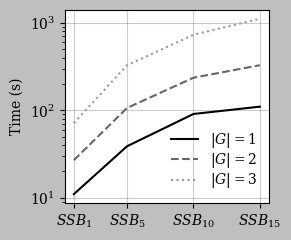

In [22]:
def plot(k):
    
    i = 0
    m = ["-", "--", ":"]
    
    fig, axs = plt.subplots(1, 1, figsize=figsize11)  # , sharey="all", constrained_layout=True
    for x in sorted(data["nparents"].unique()):
        ddata = data
        # ddata = ddata[ddata["cube"] != 10]
        ddata = ddata[ddata["nsiblings"] == 0]
        # ddata = ddata[ddata["curid"] != "FOO"]
        ddata = ddata[ddata["k"] == k]
        ddata = ddata[ddata["nparents"] == x]
        
        if k == 3:
            ddata = ddata[["cube", "curid", 'benchmark_time', 'comparison_time', 'label_time']].groupby(["cube", "curid"]).sum()

        ddata = ddata[~ddata.groupby('cube')['benchmark_time'].apply(is_outlier)]
        gddata = ddata.groupby(['cube'])
        xs = [x * 6000000 for x in gddata.groups.keys()]
        axs.plot(xs, gddata['benchmark_time'].mean() + gddata['comparison_time'].mean() + gddata['label_time'].mean(), 
                 linestyle=m[i], label = "$|G|=" + str(x) + "$")
        i += 1
        
        print("!! " + str(x))
        print(gddata.mean())
        # print("--------")
        # print(gddata['benchmark_time'].mean() + gddata['comparison_time'].mean() + gddata['label_time'].mean())
        # print("\n\n")
        
        # print("!!!benchmark " + str(gddata['benchmark_time'].mean()))
        # print("!!!comparison " + str(gddata['comparison_time'].mean()))
        # print("!!!label " + str(gddata['label_time'].mean()))
        
        axs.set_xticks(xs)
        axs.set_xticklabels([myticks(x) for x in xs])
        axs.set_xticklabels(["$SSB_{" + str(int(x/6000000)) + "}$" for x in xs])

    axs.legend(columnspacing=0.1, labelspacing=0.1, frameon=False)
    axs.set_ylabel('Time (s)')
    # axs.set_xlabel('$|SSB|$')
    axs.set_yscale('log')
    axs.set_axisbelow(True)
    axs.grid(axis='both', alpha=0.2)
    # axs.set_xscale('log')
    fig.tight_layout()
    if k == 1:
        fig.savefig("../../../resources/assess/charts/efficiency_parents_auto.pdf")
        fig.savefig("../../../resources/assess/charts/efficiency_parents_auto.svg")
    return fig

plot(1)

1
--------
cube
1     11.134406
5     36.469325
10    83.505153
15    96.705961
dtype: float64



!!!benchmark cube
1     11.075617
5     36.422805
10    83.435709
15    96.658452
Name: benchmark_time, dtype: float64
!!!comparison cube
1     0.010654
5     0.010481
10    0.014982
15    0.010564
Name: comparison_time, dtype: float64
!!!label cube
1     0.048135
5     0.036039
10    0.054461
15    0.036945
Name: label_time, dtype: float64
2
--------
cube
1      24.103925
5     100.277436
10    223.411728
15    293.675816
dtype: float64



!!!benchmark cube
1      24.012629
5     100.202577
10    223.323679
15    293.599973
Name: benchmark_time, dtype: float64
!!!comparison cube
1     0.032850
5     0.020009
10    0.023628
15    0.019452
Name: comparison_time, dtype: float64
!!!label cube
1     0.058446
5     0.054850
10    0.064421
15    0.056391
Name: label_time, dtype: float64
3
--------
cube
1       69.519835
5      332.180500
10     689.010620
15    1045.323691
dtype: float64



!!!b

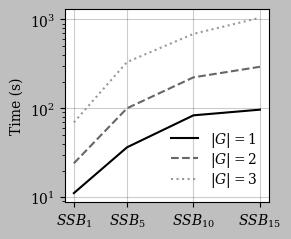

In [3]:
plot(3)

Plot the siblings

!! 1
      k  nparents  nsiblings  benchmark_time  comparison_time  label_time  \
cube                                                                        
1     1         1          1       13.189509         0.007812    0.036088   
5     1         1          1       43.399823         0.006556    0.020221   
10    1         1          1       98.150710         0.007516    0.033531   
15    1         1          1      119.823112         0.007179    0.020896   

      benchmark  comparison  label  card  
cube                                      
1             0           0      0     1  
5             0           0      0     1  
10            0           0      0     1  
15            0           0      0     1  
!! 2
      k  nparents  nsiblings  benchmark_time  comparison_time  label_time  \
cube                                                                        
1     1         2          2       20.228554         0.006515    0.019713   
5     1         2          2       57.

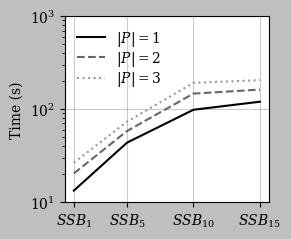

In [20]:
def plot_siblings(k):
    fig, axs   = plt.subplots(1, 1, figsize=figsize11)  # , sharey="all", constrained_layout=True
    fig2, axs2 = plt.subplots(1, 1, figsize=figsize11)  # , sharey="all", constrained_layout=True
    
    i = 0
    m = ["-", "--", ":"]
    for x in [x for x in sorted(data["nsiblings"].unique()) if x > 0]:
        ddata = data
        # ddata = ddata[ddata["cube"] != 10]
        ddata = ddata[ddata["k"] == k]
        ddata = ddata[ddata["nsiblings"] == x]
        
        if k == 3:
            ddata = ddata[["cube", "curid", 'benchmark_time', 'comparison_time', 'label_time']].groupby(["cube", "curid"]).sum()

        ddata = ddata[~ddata.groupby('cube')['benchmark_time'].apply(is_outlier)]
        gddata = ddata.groupby(['cube'])

        xs = [x * 6000000 for x in gddata.groups.keys()]
        axs.plot(xs, gddata['benchmark_time'].mean() + gddata['comparison_time'].mean() + gddata['label_time'].mean(), label = "$|P|=" + str(x) + "$", linestyle=m[i])
        
        # if x == 3:
        pivoteddf = ddata[["cube", 'benchmark_time', 'comparison_time', 'label_time']].melt(id_vars=["cube"], var_name="Mea", value_name="Val")
        pivoteddf.groupby(["cube", "Mea"]).mean().unstack().plot.bar(ax=axs2, stacked=True)
        pivoteddf[pivoteddf["Mea"] != "benchmark_time"].groupby(["cube", "Mea"]).mean().unstack().plot.bar(ax=axs2, stacked=True)
        print("!! " + str(x))
        print(gddata.mean())
        i += 1

    
        # print(x)
        # print("--------")
        # print(gddata['benchmark_time'].mean() + gddata['comparison_time'].mean() + gddata['label_time'].mean())
        # print("\n\n")
        axs.set_xticks(xs)
        axs.set_yticks([10, 100, 1000])
        axs.set_xticklabels(["$SSB_{" + str(int(x/6000000)) + "}$" for x in xs])
        
        # axs2.set_xticks([0, 1, 2])
        # axs2.set_yticks([10, 100, 1000])
        # axs2.set_xticklabels(["$SSB_{" + str(int(x/6000000)) + "}$" for x in xs])

    axs.legend(columnspacing=0.1, labelspacing=0.1, frameon=False)
    axs.set_ylabel('Time (s)')
    axs.set_yscale('log')
    axs.set_yticks([10, 100, 1000])
    axs.set_axisbelow(True)
    axs.grid(axis='both', alpha=0.2)
    fig.tight_layout()
    
    axs2.legend(columnspacing=0.1, labelspacing=0.1, frameon=False)
    axs2.set_ylabel('Time (s)')
    axs2.set_yscale('log')
    # axs2.set_yticks([10, 100, 1000])
    axs2.set_axisbelow(True)
    axs2.grid(axis='both', alpha=0.2)
    fig2.tight_layout()

    if k == 1:
        fig.savefig("../../../resources/assess/charts/efficiency_siblings_auto.pdf")
        fig.savefig("../../../resources/assess/charts/efficiency_siblings_auto.svg")
    return fig, fig2

fig, fig2 = plot_siblings(1)
fig